<a href="https://colab.research.google.com/github/kalaiselvan-t/Deep-Learning/blob/master/NN%20Workbook%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Horse or Human Classifier

- Load datasets manually
- Use ImageGenerator to split to generate labels

In [ ]:
'''
Download the dataset
'''
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2023-03-11 12:08:02--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.153.128, 74.125.143.128, 108.177.127.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.153.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M  41.2MB/s    in 4.1s    

2023-03-11 12:08:06 (34.9 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [ ]:
'''
Extract the Zip file
'''

import zipfile

local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

In [ ]:
'''
Create training subdirectory
'''

import os

train_horse_dir = os.path.join('./horse-or-human/horses')
train_human_dir = os.path.join('./horse-or-human/humans')

train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)

print(train_horse_names[:10])
print(train_human_names[:10])

print("Total no of training horse images: ", len(os.listdir(train_horse_dir)))
print("Total no of training human images: ", len(os.listdir(train_human_dir)))

['horse12-5.png', 'horse02-3.png', 'horse37-7.png', 'horse32-4.png', 'horse38-0.png', 'horse14-8.png', 'horse26-3.png', 'horse05-3.png', 'horse25-7.png', 'horse24-0.png']
['human15-19.png', 'human13-14.png', 'human07-17.png', 'human17-18.png', 'human01-25.png', 'human07-15.png', 'human11-21.png', 'human10-13.png', 'human02-25.png', 'human01-26.png']
Total no of training horse images:  500
Total no of training human images:  527


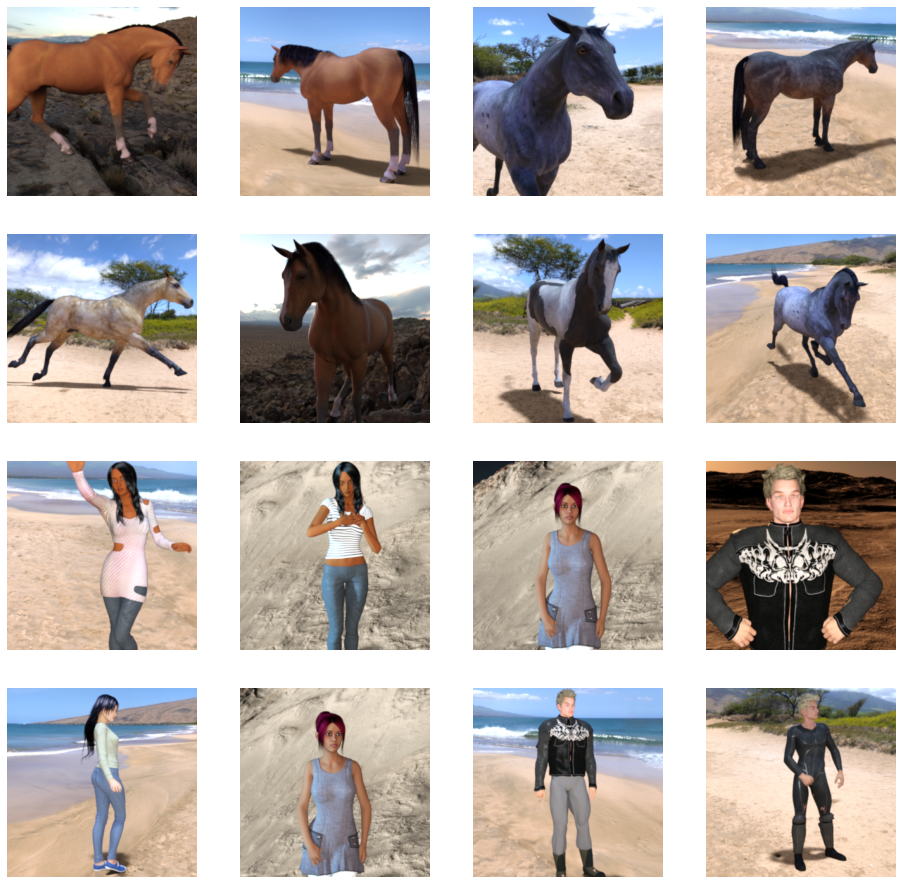

In [ ]:
'''
Visualize images from the dataset
'''

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
pic_index += 8
next_horse_pic = [os.path.join(train_horse_dir, fname)
                  for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pic = [os.path.join(train_human_dir, fname)
                  for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pic + next_human_pic):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

In [ ]:
'''
Create the model
'''

import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from keras.optimizers import RMSprop

model = models.Sequential()

model.add(layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [ ]:
'''
Generate labels from ImageDataGenerator
'''

from keras.preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(rescale=1/255)

train_generator = training_datagen.flow_from_directory(
    './horse-or-human',
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [ ]:
'''
Train the model
'''

history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1)

Epoch 1/15
8/8 [==============================] - 18s 724ms/step - loss: 0.9774 - accuracy: 0.5273
Epoch 2/15
8/8 [==============================] - 7s 858ms/step - loss: 0.6722 - accuracy: 0.6919
Epoch 3/15
8/8 [==============================] - 8s 1s/step - loss: 0.7216 - accuracy: 0.6943
Epoch 4/15
8/8 [==============================] - 7s 783ms/step - loss: 0.4394 - accuracy: 0.7853
Epoch 5/15
8/8 [==============================] - 8s 881ms/step - loss: 0.4531 - accuracy: 0.8187
Epoch 6/15
8/8 [==============================] - 7s 891ms/step - loss: 0.5213 - accuracy: 0.8610
Epoch 7/15
8/8 [==============================] - 7s 810ms/step - loss: 0.2932 - accuracy: 0.8710
Epoch 8/15
8/8 [==============================] - 7s 786ms/step - loss: 0.4579 - accuracy: 0.8331
Epoch 9/15
8/8 [==============================] - 7s 1s/step - loss: 0.2213 - accuracy: 0.9255
Epoch 10/15
8/8 [==============================] - 9s 1s/step - loss: 0.1789 - accuracy: 0.9277
Epoch 11/15
8/8 [==========

In [ ]:
# Upload images and test the model

import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/'+fn
  img = load_img(path, target_size=(300,300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)
  print(classes[0])
  if classes[0] > 0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving horse-2.jpg to horse-2.jpg
1/1 [==============================] - 0s 278ms/step
[9.392669e-07]
horse-2.jpg is a horse


#### Network with Validation Set

In [ ]:
# Download the training set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2023-03-11 12:10:59--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 172.217.218.128, 142.251.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip.1’

horse-or-human.zip. 100%[===================>] 142.65M  40.8MB/s    in 4.1s    

2023-03-11 12:11:03 (34.7 MB/s) - ‘horse-or-human.zip.1’ saved [149574867/149574867]



In [ ]:
# Download the validation set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2023-03-11 12:11:14--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 172.217.218.128, 142.251.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  12.8MB/s    in 0.9s    

2023-03-11 12:11:16 (12.8 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



In [ ]:
import zipfile

local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')

local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

In [ ]:
import os

train_horse_dir = os.path.join('./horse-or-human/horses')
train_human_dir = os.path.join('./horse-or-human/humans')

validation_horse_dir = os.path.join('./validation-horse-or-human/horses')
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)

validation_horse_names = os.listdir(validation_horse_dir)
validation_human_names = os.listdir(validation_human_dir)

print(f'total training horse images: {len(os.listdir(train_horse_dir))}')
print(f'total training human images: {len(os.listdir(train_human_dir))}')
print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from keras.optimizers import RMSprop

model = models.Sequential()

model.add(layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 149, 149, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 73, 73, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 35, 35, 64)      

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    './horse-or-human/',
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    './validation-horse-or-human/',
    target_size=(300,300),
    batch_size=32,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1,
    validation_data=valid_generator,
    validation_steps=8
)

#### Effect of compacted images in Training

Images can be compacted using the ImageDataGenerator

In [ ]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2023-03-13 09:57:21--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.152.128, 142.250.128.128, 142.251.6.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.152.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   271MB/s    in 0.5s    

2023-03-13 09:57:21 (271 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [ ]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2023-03-13 09:57:25--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.152.128, 142.250.128.128, 142.251.6.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.152.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  --.-KB/s    in 0.09s   

2023-03-13 09:57:25 (128 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



In [ ]:
import zipfile

local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')

local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

In [ ]:
import os
train_horse_dir = os.path.join('./horse-or-human/horses')
train_human_dir = os.path.join('./horse-or-human/humans')
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)
validation_horse_names = os.listdir(validation_horse_dir)
validation_human_names = os.listdir(validation_human_dir)

print(f'Total training horse images: {len(os.listdir(train_horse_dir))}')
print(f'Total training human images: {len(os.listdir(train_human_dir))}')
print(f'Total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'Total validation human images: {len(os.listdir(validation_human_dir))}')

Total training horse images: 500
Total training human images: 527
Total validation horse images: 128
Total validation human images: 128


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator

model = models.Sequential()

model.add(layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)      

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    './horse-or-human/',
    target_size=(150,150),
    batch_size=128,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    './validation-horse-or-human/',
    target_size=(150,150),
    batch_size=32,
    class_mode='binary')


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1,
    validation_data = validation_generator,
    validation_steps=8
)

Epoch 1/15
8/8 [==============================] - 9s 1s/step - loss: 1.8886 - accuracy: 0.5406 - val_loss: 1.0118 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 7s 934ms/step - loss: 0.5826 - accuracy: 0.6752 - val_loss: 0.9347 - val_accuracy: 0.6758
Epoch 3/15
8/8 [==============================] - 6s 795ms/step - loss: 0.3068 - accuracy: 0.8877 - val_loss: 0.8873 - val_accuracy: 0.8008
Epoch 4/15
8/8 [==============================] - 6s 766ms/step - loss: 0.1084 - accuracy: 0.9633 - val_loss: 1.1382 - val_accuracy: 0.8359
Epoch 5/15
8/8 [==============================] - 8s 985ms/step - loss: 0.0927 - accuracy: 0.9590 - val_loss: 1.3812 - val_accuracy: 0.8047
Epoch 6/15
8/8 [==============================] - 6s 884ms/step - loss: 0.0253 - accuracy: 0.9911 - val_loss: 0.8171 - val_accuracy: 0.8789
Epoch 7/15
8/8 [==============================] - 7s 800ms/step - loss: 0.1112 - accuracy: 0.9600 - val_loss: 1.8573 - val_accuracy: 0.8047
Epoch 8/15
8/8 [=======

In [ ]:
## NOTE: If you are using Safari and this cell throws an error,
## please skip this block and run the next one instead.

import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

#### Classifying: Happy or Sad dataset